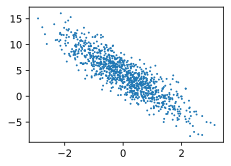

In [24]:
from d2l import torch as d2l
import numpy as np
import torch
from torch.utils import data

true_w = torch.Tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)
labels = labels.reshape(-1,1)

d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(d2l.numpy(features[:, 1]), d2l.numpy(labels), 1);

In [13]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [14]:
next(iter(data_iter))

[tensor([[ 1.1891e+00, -4.8972e-01],
         [-6.3529e-01, -4.4202e-01],
         [ 8.0559e-04, -1.5063e+00],
         [ 5.9262e-01,  4.2549e-01],
         [-3.1937e-01, -1.6261e-01],
         [ 8.8298e-01, -6.3818e-02],
         [-7.8858e-01,  6.9459e-01],
         [ 1.6102e-01, -6.3795e-01],
         [-3.3685e-01, -1.5984e+00],
         [ 1.2024e+00,  1.0941e+00]]),
 tensor([[8.2370],
         [4.4149],
         [9.3337],
         [3.9318],
         [4.1261],
         [6.1804],
         [0.2625],
         [6.6952],
         [8.9789],
         [2.8982]])]

In [25]:
# `nn` is an abbreviation for neural networks
from torch import nn
net = nn.Sequential(nn.Linear(2, 1))

In [26]:
net[0].weight.data.uniform_(0.0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [27]:
loss = nn.MSELoss()

In [28]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [29]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000385
epoch 2, loss 0.000104
epoch 3, loss 0.000103


In [30]:
w = net[0].weight.data
print('error in estimating w:', true_w - d2l.reshape(w, true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([-3.0518e-05, -3.5954e-04])
error in estimating b: tensor([-0.0003])
